In [32]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Funciones necesarias para que las demas funciones funcionen . 

In [34]:
# Funcion de la que me tomo mas tiempo hacerlo 
def gauss(a,b):
    '''Funcion que retorna un array "x" despues de hacer una eliminacion de Gauss con pivoteo'''
    
    n = a.shape[0]
    # https://numpy.org/doc/1.18/reference/generated/numpy.ndarray.html
    # estamos creando un matriz columna 
    x = np.ndarray( shape=(n,1), dtype = np.float64 )   
    a_copy = a.copy() # con el fin de hacer segumiento a la matriz al final . 
    s = [] # lista para alojar los valores maximos (es parte del pivoteo)
    l = [] # usada para reordenar como se hara la eliminacion
    
    # #### LLENAMOS LA LISTA "S" CON LOS VALORES MAXIMOS  #######
    for i in range(0,n):
        l.append(i) # vamos agregando .Establecemos esta matriz
        smax = 0 # el maximo de una fila es importante para el pivote
        for j in range(0,n):
            # se escoje el maximo entre todos los elemnos de una fila
            smax = max(smax,abs(a[i][j])) 
            
        s.append(smax) # alojamos el maximo de la fila
    
    # ---------- print('l inicial ' ,l) (SEGUIMIENTO)
    # --------- print('s inicial ', s) (SEGUIMIENTO)
    
    # ##### PIVOTEO(ESCOJEMOS LA FILAS PIVOTES Y ELIMINAMOS) #########
    # k hace referencia a la columna donde se hara ceros seran creados en el array a_ij
    # Pero recuerda que los ceros no se crean realmente . Por que en esos espacios almacenamos 
    # otras cosas(los multiplicadorese para descomposicion LU) . 
    for k in range(0,n-1):
        
        rmax = 0 
        # ##### SE ESCOJE LA FILA PIVOTE EN ESTE BLOQUE #########
        for i in range (k,n):
            
            # esto es para escoger la correcta fila pivote
            # se esta dividiendo (elemnto de columna k y fila [k-n][k])/los Smax
            r = abs( a[l[i]][k] / s[l[i]] )
            if (r > rmax):
                # j = i es para escoger el correcto pivote
                # rmax = r es para escoger la maxima proporcion(ratio)
                rmax,j = r,i
                # al final no usaremos rmax , solo es necesario para detener el if cuando sea necesario
              
        l[j],l[k] = l[k],l[j] # luego se cambia el lugar donde ocurre el maximo proporcion
        
        
        # ####### ELIMINACION GAUSSIANA PERO LA FILA PIVOTE LO DETERMINA "l" ################## 
        for i in range(k+1,n):
            xmult = a[l[i]][k]/a[l[k]][k]
            a[l[i]][k] = xmult # los guardo para fines de LU y para eliminar "b"
            
            a_copy[l[i]][k] -= xmult*a[l[k]][k] # para hacer segumiento(se puede borrar) 
            
            # este for hara segumiento de que se haga operaciones en toda la fila que no es pivot
            for j in range(k+1,n):
                a[l[i]][j] -= xmult*a[l[k]][j]
                a_copy[l[i]][j] -= xmult*a[l[k]][j] # para hacer seguimiento(se puede borrar)
    
    # --------- print('l final ' ,l) (SEGUIMIENTO)
    # --------- print('a final copy \n' , a_copy) (SEGUIMIENTO)
    # ##### SEGIMOS PIVOTEANDO PERO PARA LA MATRIZ b###   
    for k in range(0,n-1):
        
        # recuerda el que ahora maneja el orden sera la lista "l"
        # debemos hacer las operaciones en el mismo orden que hemos hecho para "a"
        for i in range(k+1,n):
            b[l[i]] -= a[l[i]][k]*b[l[k]]
            
    #------ print('b final \n ' , b) (SEGUIMIENTO)
    
    # ######### AHORA HACEMOS LA SUSTITUCION BACKWARD ##########
    
    # espero se entienda por que -1 . Es por la cuenta por cero
    x[n-1] = b[l[n-1]]/a[l[n-1]][n-1]
    
    for i in range(n-2,-1,-1):
        summ = b[l[i]]
        for j in range(i+1,n):
            summ -= a[l[i]][j]*x[j]
            
        x[i] = summ/a[l[i]][i]
        
        
    return x


# Aca implementare regresion general ( la lineal esta incluido por supuesto)

<img src="regresion_polinomial.png">

In [35]:
def regresion_orden_n(data,n=1):
    ''' Regresion de cualquier orden . Esta funcion retorna un polinomio de orden "n" que hace regresion a los datos , ademas regresa los valores de los parametros'''
    
    # la primera fila de "data" son los x's y la segunda fila de "data" son los y's
    # n = sera el orden del polinomio que se hara la regresion
    # m = el numero de datos 
    m = data.shape[1] # la dimension de los datos . Eso necesitamos 
    x = data[0]
    y = data[1]
    
    ########## Creamos el sistema lineal que vamos a resolver ######### 
    
    # creamos la matriz m+1 . Recuerda una regresion lineal crea una matriz 2*2 . 
    # Es logico que una regresion polinomial de orden n genere un sistema de ecuaciones de orden n+1 . 
    A = np.ndarray( shape=(n+1,n+1), dtype = np.float64 )
    b = np.ndarray( shape=(n+1,1), dtype = np.float64 )
    
    # llenamos la matriz con los datos 
    # https://es.wikipedia.org/wiki/Regresi%C3%B3n_no_lineal (aca esta el porque hice de esta manera)
    for i in range(0,n+1):
        for j in range(0,n+1):
            # matriz
            A[i,j] = np.sum(x**(j+i)) 
            b[i,0] = np.sum(x**(i)*y)
            
    ########## Resolvemos la matriz #############
    a = gauss(A.copy(),b.copy())
    
    # creamos el polinomio que hace regresion a nuestros datos
    # pongo evalf y no "x" para no confundir con mi array en la primeras lineas de la funcion cabeza (ver lineas arriba )
    def pn(evalf):
        acum = 0
        # recuerda que es del orden de "n" el polinomio y "a" es una array con (n+1) elementos
        for i in range(0,len(a)):
            acum = acum + a[i,0]*(evalf)**(i)
            
        return acum
    
    return pn,a

# Probando mi regresion para cualquier orden

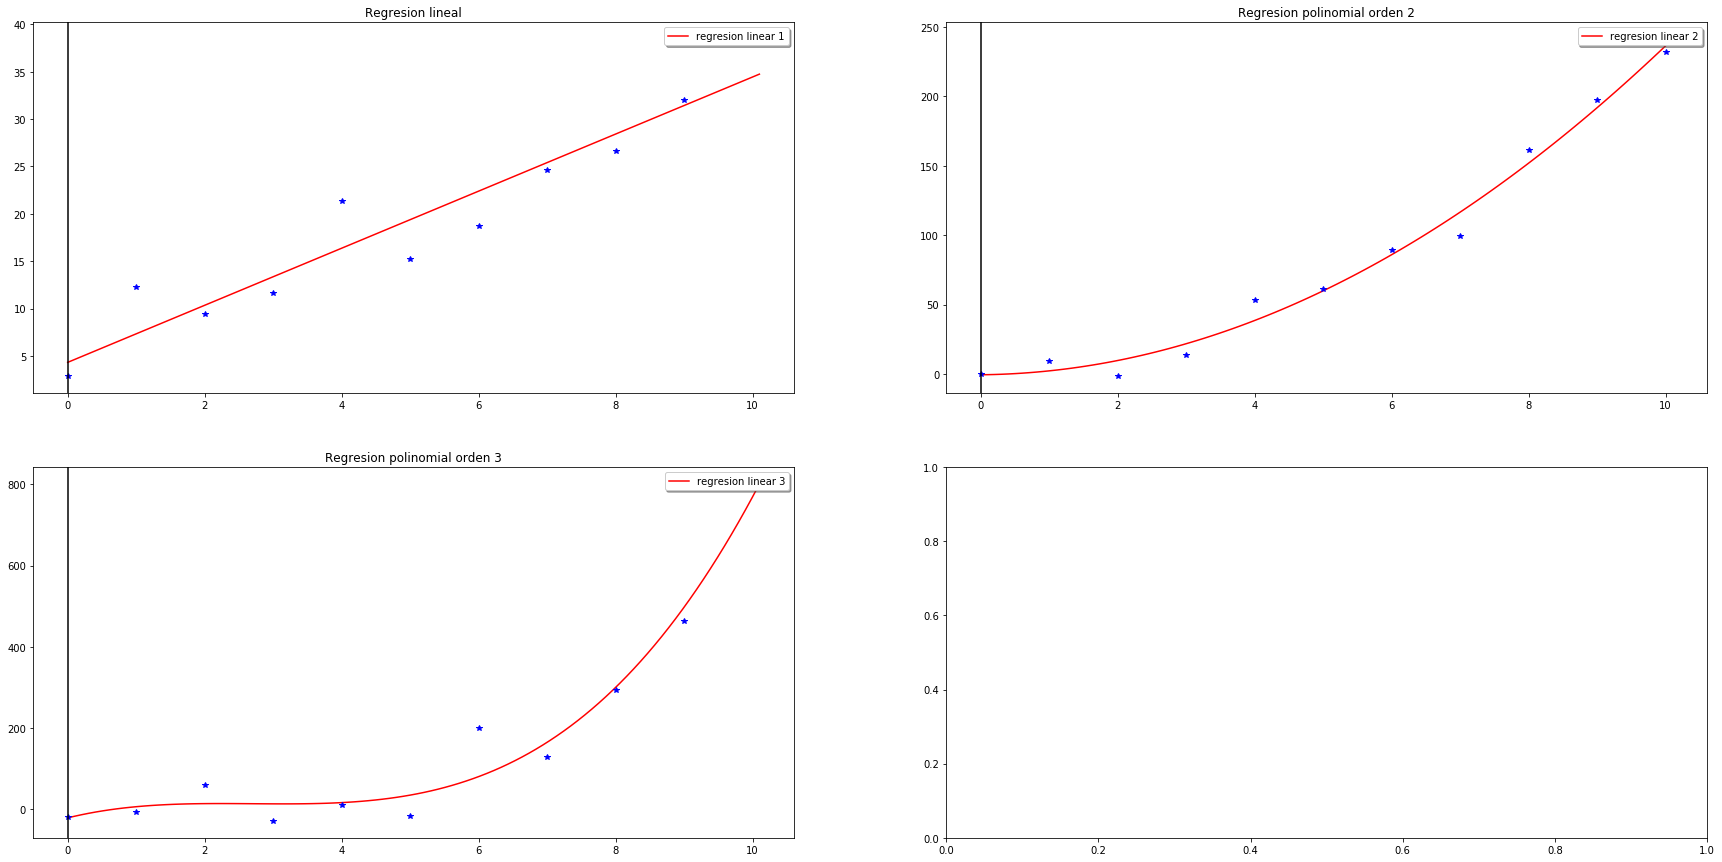

In [36]:
import random 
####### Armamos la data para la regresion lineal 
lista = []
for i in range(11):
    lista.append(3*i+5 + random.uniform(-5,5)) # regresa un numero float entre -1 y 1 
x1 = np.arange(0,11,1)
y1 = np.array(lista,dtype=np.float64)
data1 = np.array([x1,y1],dtype=np.float64)
# creamos las funciones 
pn_ord_1,parame = regresion_orden_n(data1.copy(),n=1)


######## Armamos la data para la regresion polinomial de segudno orden
lista = []
for i in range(11):
    lista.append(2*i**2+3*i -5 + random.uniform(-20,20)) # regresa un numero float entre -1 y 1 
x2 = np.arange(0,11,1)
y2 = np.array(lista,dtype=np.float64)
data2 = np.array([x2,y2],dtype=np.float64)
# creamos las funciones 
pn_ord_2,parame = regresion_orden_n(data2.copy(),n=2)


######## Armamos la data para la regresion polinomial de tercer orden
lista = []
for i in range(11):
    lista.append(i**3-2*i**2-3*i-4 + random.uniform(-100,100)) # regresa un numero float entre -1 y 1 
x3 = np.arange(0,11,1)
y3 = np.array(lista,dtype=np.float64)
data3 = np.array([x3,y3],dtype=np.float64)
# creamos las funciones 
pn_ord_3,parame = regresion_orden_n(data3.copy(),n=3)


x1rango = np.linspace(0,10.1,100)

# graficamos 
fig, axes = plt.subplots(nrows=2,ncols=2 , figsize = (30,15)) # fig es la figura y axes son los ejes (son elementos de cada figura)
axes[0,0].plot(x1rango,pn_ord_1(x1rango),'r',label="regresion linear 1")
axes[0,0].plot(data1[0],data1[1],'*b')
axes[0,0].axvline(0, color="black")
axes[0,0].set_title('Regresion lineal')
# axes[0,0].set_ylim(-3, 3)
axes[0,0].legend( loc='upper right', shadow=True) # se pone la legenda 


axes[0,1].plot(x1rango,pn_ord_2(x1rango),'r',label="regresion linear 2")
axes[0,1].plot(data2[0],data2[1],'*b')
axes[0,1].axvline(0, color="black")
axes[0,1].set_title('Regresion polinomial orden 2')
# axes[0,0].set_ylim(-3, 3)
axes[0,1].legend( loc='upper right', shadow=True) # se pone la legenda 


axes[1,0].plot(x1rango,pn_ord_3(x1rango),'r',label="regresion linear 3")
axes[1,0].plot(data3[0],data3[1],'*b')
axes[1,0].axvline(0, color="black")
axes[1,0].set_title('Regresion polinomial orden 3')
# axes[0,0].set_ylim(-3, 3)
axes[1,0].legend( loc='upper right', shadow=True) # se pone la legenda



plt.show()

# Aca implementare regresion no lineal 
<img src="regresion_no_lineal.png">

In [37]:
# Esta regresion no lineal solo sirve para cuando se tiene dos parametros . a_0 y a_1
# toma como parametro la data, la funcion , su derivada parcial respecto a0 y tambien la de a1 . Los dos ultimos son los a0 y a1 iniciales estimados por el que llama la funcion .
# cabe recordar que "f" , fa0 y fa1 debe tener 3 parametros como argumentos . En el codigo veras la razon de esto 
def regresion_no_lineal(data,f,fa0,fa1,a0_in=0,a1_in=0,kmax=1000):
    '''
    funcion que acepta la data , funciones y sus derivadas parciales , con los parametros iniciales
     Y retorna los parametros a0 y a1 que hacen una regresion lineal a la funcion
     '''
    # m = es el numero de datos que se tiene
    m = data.shape[1]
    x = data[0]
    y = data[1]
    a0 = a0_in
    a1 = a1_in
    #### creamos las matrices que vamos a usar 
    # D = Z.\deltaA + E
    D = np.ndarray(shape=(m,1),dtype=np.float64)
    Z = np.ndarray(shape=(m,2),dtype=np.float64)

    ##### comenzamos con las iteraciones 
    for k in range(0,kmax):
        # llenamos la matriz que muta en cada iteracion
        for i in range(0,m):
            D[i,0] = y[i] - f(a0,a1,x[i])
            for j in range(0,2):
                if j == 0:
                    Z[i,j] = fa0(a0,a1,x[i])
                elif j == 1:
                    Z[i,j] = fa1(a0,a1,x[i])
        
        #### Calculamos los \delta(a0) y \delta(a1) 
        # para hacer eso formamos el sistema de ecuaciones a resolver 
        A = Z.T.dot(Z) # saco la transpuesta a una matriz y luego la multiplico matricialmente con la misma 
        b = Z.T.dot(D) # Saco la traspuesta y la multiplico matricialmente con la misma   
        delta_a = gauss(A,b)
        
        ### actualizamos los datos
        a0 = a0 + delta_a[0,0]
        a1 = a1 + delta_a[1,0]
        
           
    return a0,a1

    
            

# Probando mi regresion no lineal con la funcion seno 

xxxxxxxxxx
3.128778367752913 2.0291563167442535


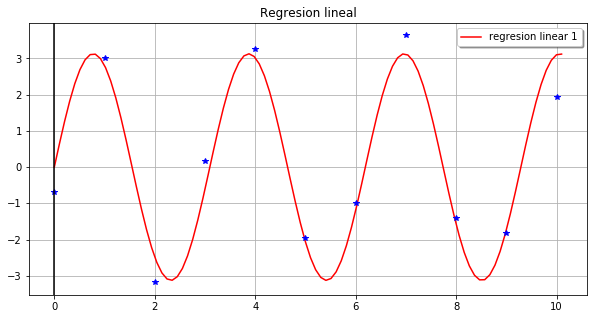

In [38]:
def funcion(a0,a1,xev):
    return a0*np.sin(a1*xev)

def derviva0_funcion(a0,a1,xev):
    return np.sin(a1*xev)

def deriva1_funcion(a0,a1,xev):
    return a0*xev*np.cos(a1*xev)

import random 
####### Armamos la data para la regresion lineal 
lista = []
for i in range(11):
    lista.append(3*np.sin(2*i) + random.uniform(-1,1)) # regresa un numero float entre -1 y 1 


x1 = np.arange(0,11,1)
y1 = np.array(lista,dtype=np.float64)
data1 = np.array([x1,y1],dtype=np.float64)

# creamos las funciones 
a0_ajust,a1_ajust = regresion_no_lineal(data1.copy(),f=funcion,fa0=derviva0_funcion,fa1=deriva1_funcion,a0_in=3,a1_in=2)
print("x"*10)
print(a0_ajust,a1_ajust)

x1rango = np.linspace(0,10.1,100)


# graficamos 
fig, axes = plt.subplots(nrows=1,ncols=1 , figsize = (10,5)) # fig es la figura y axes son los ejes (son elementos de cada figura)
axes.plot(x1rango,funcion(a0_ajust,a1_ajust,x1rango),'r',label="regresion linear 1")
axes.plot(data1[0],data1[1],'*b')
axes.axvline(0, color="black")
axes.set_title('Regresion lineal')
# axes[0,0].set_ylim(-3, 3)
axes.grid("True")
axes.legend( loc='upper right', shadow=True) # se pone la legenda 


plt.show()

# Problema 1 

\begin{align}
y &= \left(\dfrac{a+\sqrt{x}}{b\sqrt{x}}\right)^2 \\
\sqrt{y}&= \dfrac{a}{b}\dfrac{1}{\sqrt{x}} + \dfrac{1}{b} 
\end{align}
Luego haciendo un cambio
\begin{align}
\dfrac{a}{b} &= a1 \\
\dfrac{1}{b} &=a0 \\
\dfrac{1}{\sqrt{x}} &= x1 \\
\sqrt{y} &= y1
\end{align}
Tenemos que hacer regresion lineal 
$$ y1 = a1\cdot x1 + a0$$

In [39]:
# tenemos la siguiente data
x = np.array([0.5,1,2,3,4],dtype=np.float64)
y = np.array([10.4,5.8,3.3,2.4,2],dtype=np.float64)
datareal = np.array([x,y],dtype=np.float64)

# transformamos la data para el problema linealizado
x1 = 1/x**(1/2)
y1 = y**(1/2)

# armamos la data para la linealizacion del problema
data1 = np.array([x1,y1],dtype=np.float64)
pn_ord_1,parametros = regresion_orden_n(data1.copy(),n=1)

# ya que tenemos los parametros , los guardamos 
a0 = parametros[0,0] 
a1 = parametros[1,0]
# luego hallamos a y b de las relaciones anteriores que usamos para linealizar nuestro problema
b = 1/a0
a = a1*b

print("Los valores de a y b son por lo tanto")
print(f'a = {a}')
print(f'b = {b}') 

Los valores de a y b son por lo tanto
a = 4.861361656451297
b = 2.440288253956208


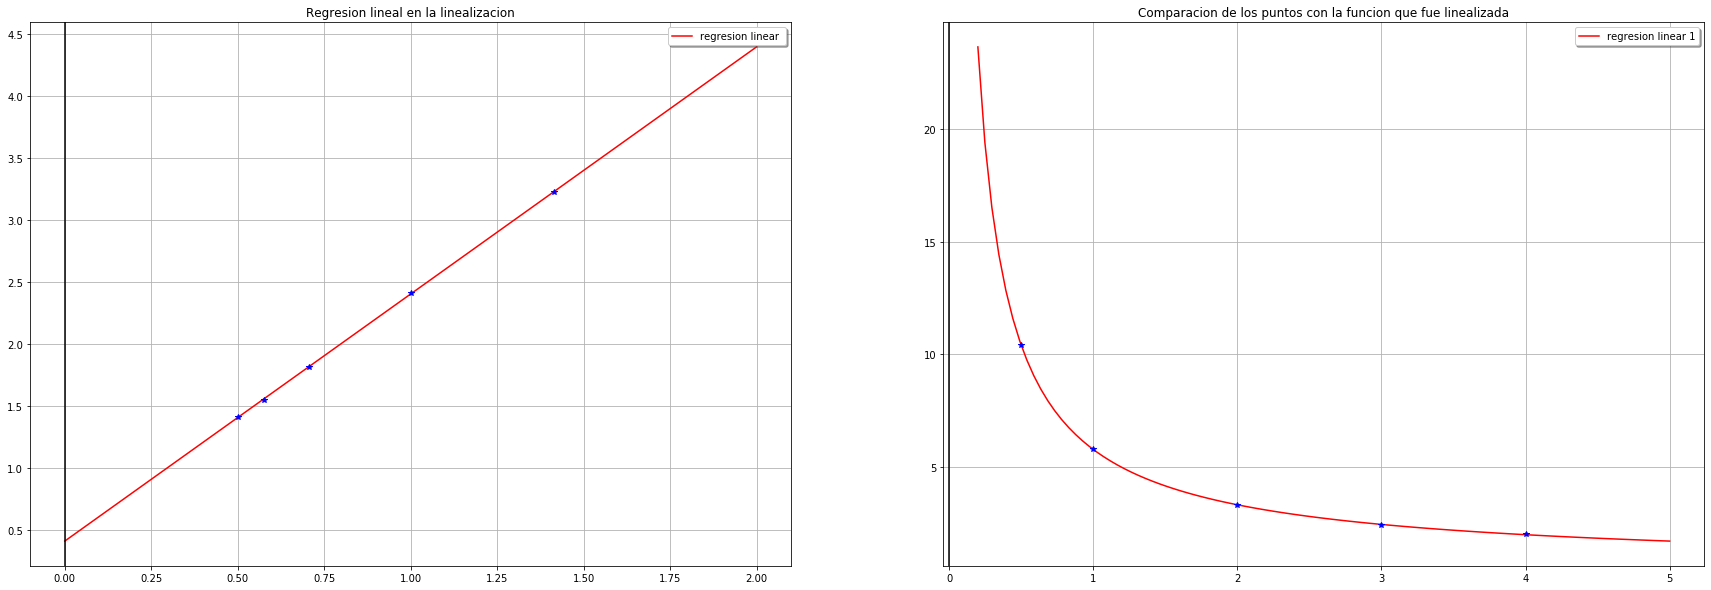

In [40]:
######## Comprobando que resulta los a y b deseados######
def funcion1(acal,bcal,x):
    return ( (acal+x**(1/2))/(bcal*x**(1/2)) )**2

x1rango = np.linspace(0.2,5,100)
rango = np.linspace(0,2,100)
# graficamos 
fig, axes = plt.subplots(nrows=1,ncols=2 , figsize = (30,10)) # fig es la figura y axes son los ejes (son elementos de cada figura)
axes[0].plot(rango,pn_ord_1(rango),'r',label="regresion linear ")
axes[0].plot(data1[0],data1[1],'*b')
axes[0].axvline(0, color="black")
axes[0].set_title('Regresion lineal en la linealizacion')
axes[0].grid("True")
axes[0].legend( loc='upper right', shadow=True) # se pone la legenda 

axes[1].plot(x1rango,funcion1(a,b,x1rango),'r',label="regresion linear 1")
axes[1].plot(datareal[0],datareal[1],'*b')
axes[1].axvline(0, color="black")
axes[1].set_title('Comparacion de los puntos con la funcion que fue linealizada')
axes[1].grid("True")
axes[1].legend( loc='upper right', shadow=True) # se pone la legenda 

plt.show()

In [41]:
# comproblemos que es el minimo 
error1 = np.sum( ( funcion1(a,b,datareal[0])  - datareal[1] )**2 )
print(f"El errror que se obtuvo fue de error : {error1}")

El errror que se obtuvo fue de error : 0.0028643984188465354


# Problema 2 

##### Usamos la linealizacion para esta funcion 
\begin{align}
y &= \alpha_4 x e^{\beta_4 x} \\
ln\left(\dfrac{y}{x}\right) &= \beta_4 x + ln(\alpha_4)
\end{align}
Haciendo el siguiente cambio 
\begin{align}
ln\left(\dfrac{y}{x}\right) &= y1 \\
x &= x1 \\
\beta_4 &= a1 \\
ln(\alpha_4) &= a0
\end{align}
Tenemos que hacer regresion lineal a 
$$ y1 = a1 \cdot x1 + a0 $$

In [42]:
# tenemos la siguiente data
x = np.array([0.1,0.2,0.4,0.6,0.9,1.3,1.5,1.7,1.8],dtype=np.float64)
y = np.array([0.75,1.25,1.45,1.25,0.85,0.55,0.35,0.28,0.18],dtype=np.float64)
datareal = np.array([x,y],dtype=np.float64)

# transformamos la data para el problema linealizado
x1 = x
y1 = np.log(y/x)

# armamos la data para la linealizacion del problema
data1 = np.array([x1,y1],dtype=np.float64)

# Resolvamos la linealizacion , teniendo la funcion con sus parametros
pn_ord_1,parametros = regresion_orden_n(data1.copy(),n=1)

# ya que tenemos los parametros , los guardamos 
a0 = parametros[0,0] 
a1 = parametros[1,0]

# luego hallamos a y b de las relaciones anteriores que usamos para linealizar nuestro problema
alpha4 = np.e**(a0)
beta4 = a1

print("Los valores de alpha4 y beta4 usando linealizacion")
print(f'alpha4 = {alpha4}')
print(f'beta4 = {beta4}') 

Los valores de alpha4 y beta4 usando linealizacion
alpha4 = 9.661785859642904
beta4 = -2.473308765704635


#### Usamos la regresion no lineal 

In [43]:
def funcion(alpha4_cal,beta4_cal,xev):
    return alpha4_cal*xev*np.e**(beta4_cal*xev)

def derivalpha4_funcion(alpha4_cal,beta4_cal,xev):
    return xev*np.e**(beta4_cal*xev)

def derivabeta4_funcion(alpha4_cal,beta4_cal,xev):
    return alpha4_cal*xev**2*np.e**(beta4_cal*xev)

x = np.array([0.1,0.2,0.4,0.6,0.9,1.3,1.5,1.7,1.8],dtype=np.float64)
y = np.array([0.75,1.25,1.45,1.25,0.85,0.55,0.35,0.28,0.18],dtype=np.float64)
datareal = np.array([x,y],dtype=np.float64)

# Obtengamos los parametros 
########### Pregunta , ve cambia las condiciones iniciales y todo cambiara , ( cambia 2 por 1)
alpha4_ajust,beta4_ajust = regresion_no_lineal(datareal.copy(),f=funcion,fa0=derivalpha4_funcion,fa1=derivabeta4_funcion,a0_in=2,a1_in=0.4)
print("Los valores de alpha4 y beta4 usando regresion no lineal")
print(f'alpha4 = {alpha4_ajust}')
print(f'beta4 = {beta4_ajust}') 

Los valores de alpha4 y beta4 usando regresion no lineal
alpha4 = 9.897361567707442
beta4 = -2.5318692382283694


# Graficamos para comparar

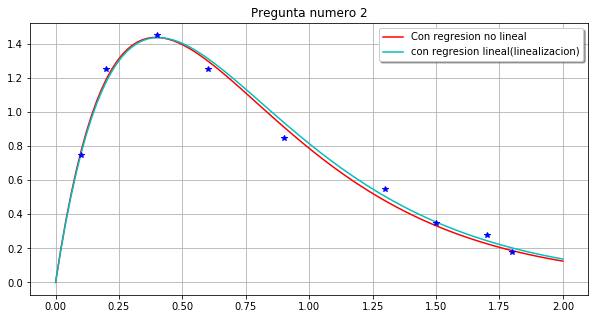

In [58]:
x1rango = np.linspace(0,2,100)

# graficamos 
fig, axes = plt.subplots(nrows=1,ncols=1 , figsize = (10,5)) # fig es la figura y axes son los ejes (son elementos de cada figura)
axes.plot(x1rango,funcion(alpha4_ajust,beta4_ajust,x1rango),'r',label="Con regresion no lineal")
axes.plot(x1rango,funcion(alpha4,beta4,x1rango),'c',label="con regresion lineal(linealizacion)")
axes.plot(datareal[0],datareal[1],'*b')
axes.set_title('Pregunta numero 2')
# axes.set_ylim(0, 2)
axes.grid("True")
axes.legend( loc='upper right', shadow=True) # se pone la legenda 


plt.show()

# Comparemos numericamente

In [45]:
# comproblemos que es el minimo 
error1 = np.sum( ( funcion(alpha4,beta4,datareal[0])  - datareal[1] )**2 )
print(f"El errror cuadratico usando linealizacion : {error1}")
error2 = np.sum( ( funcion(alpha4_ajust,beta4_ajust,datareal[0])  - datareal[1] )**2 )
print(f"El errror cuadratico usando regresion no lineal : {error2}")

########## pregunta ######### 
''' 
Es normal que error1 > error2 . Es decir una esta usando un metodo directo mientras que para hallar error 2 se esta usando un metodo iterativo con aproximaciones 
Por lo tanto yo esperaria que error 1 < error 2 . Discusion pendiente 
'''

El errror cuadratico usando linealizacion : 0.02120628164241789
El errror cuadratico usando regresion no lineal : 0.018315258899579863


' \nEs normal que error1 > error2 . Es decir una esta usando un metodo directo mientras que para hallar error 2 se esta usando un metodo iterativo con aproximaciones \nPor lo tanto yo esperaria que error 1 < error 2 . Discusion pendiente \n'

########## Resultado de Jhonatan #############
NO LINEAL : alfa4= 9.89736154327602 y beta4= -2.5318692333384005
LINEAL: alfa4= 9.661785859642901 y beta4= -2.4733087657046346